In [5]:
import nextbike.preprocessing.Preprocessing as prep
import nextbike.model.clustering.cluster as cluster
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import zscore
import numpy as np
from vincenty import vincenty 
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.linear_model import Lasso,Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import SVR
import time 

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import time 
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from sklearn.svm import SVC
import sklearn.metrics
    
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import model_selection

In [3]:
df_train = prep.get_trip_data("data/internal/dortmund.csv",with_weather=True)
df_test = prep.get_trip_data("data/internal/dortmund_test.csv",with_weather=True)

1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10


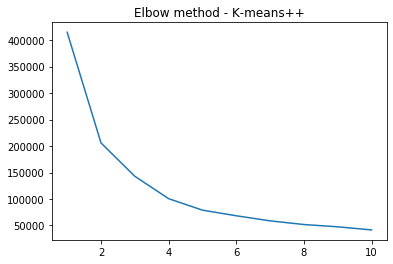

1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10


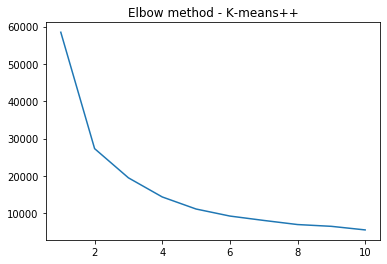

In [7]:
cluster_value_train = cluster.elbow_method(df_train)
cluster_value_test = cluster.elbow_method(df_test)

km = KMeans(n_clusters = 4)
km.fit(cluster_value_train["X_scaled"])

df_train["area_start"] = km.predict(cluster_value_train['X_scaled'])+1
df_test["area_start"] = km.predict(cluster_value_test['X_scaled'])+1

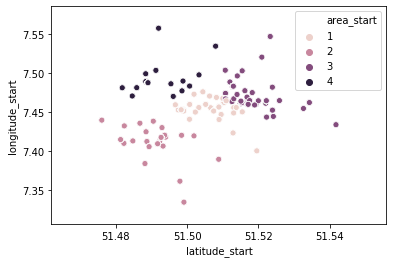

In [8]:
# train set 
sns.scatterplot("latitude_start", "longitude_start",hue="area_start",data=df_train)

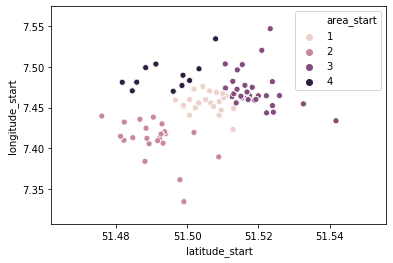

In [9]:
# test set (July)
sns.scatterplot("latitude_start", "longitude_start",hue="area_start",data=df_test)

In [10]:
y = df_train['tripLabel']
# use only start-information to classify the trip-class
X = df_train[['weekend', 'hour', 'distanceToUniversity', 'month', 'area_start']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
start = time.time()
mod = RandomForestClassifier(n_estimators=1000, min_samples_split = 2,min_samples_leaf=1, max_depth=10, max_features='auto', bootstrap= False)
mod.fit(X_train,y_train)
y_pred = mod.predict(X_test)
end = time.time()

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')


=== Classification Report ===
                    precision    recall  f1-score   support

awayFromUniversity       0.70      0.85      0.77      3099
  noUniversityRide       0.95      1.00      0.97     54000
 towardsUniversity       0.69      0.24      0.36      5144

          accuracy                           0.93     62243
         macro avg       0.78      0.70      0.70     62243
      weighted avg       0.92      0.93      0.91     62243





# Evaluating the model with the test set 

In [15]:
# not train test split 
# using the whole dataset as the test set 
X_train = df_train[['weekend', 'hour', 'distanceToUniversity', 'month', 'area_start']]

y_train = df_train['tripLabel']

# using the received test set as the test set (data for July)
X_test = df_test[['weekend', 'hour', 'distanceToUniversity', 'month', 'area_start']]

y_test = df_test['tripLabel']

In [16]:
mod = RandomForestClassifier(n_estimators=1000, min_samples_split = 2,min_samples_leaf=1, max_depth=10, max_features='auto', bootstrap= False)
mod.fit(X_train,y_train)
pred = mod.predict(X_test)
pred_train = mod.predict(X_train)


print("=== Classification Report ===")
print(classification_report(y_test, pred))
print('\n')

print("=== Classification Report ===")
print(classification_report(y_train, pred_train))
print('\n')




=== Classification Report ===
                    precision    recall  f1-score   support

awayFromUniversity       0.58      0.78      0.67      1391
  noUniversityRide       0.95      1.00      0.97     25378
 towardsUniversity       0.54      0.15      0.23      2469

          accuracy                           0.92     29238
         macro avg       0.69      0.64      0.62     29238
      weighted avg       0.90      0.92      0.90     29238



=== Classification Report ===
                    precision    recall  f1-score   support

awayFromUniversity       0.72      0.86      0.78     10375
  noUniversityRide       0.95      1.00      0.97    180107
 towardsUniversity       0.71      0.26      0.39     16994

          accuracy                           0.93    207476
         macro avg       0.79      0.71      0.71    207476
      weighted avg       0.92      0.93      0.92    207476



